Q-Table:
[[[-68.8681871  -65.10026256 -67.87125373 -65.10065968]
  [-59.92877363 -59.06871174 -60.99602561 -59.06489066]
  [-54.82125579 -53.13939974 -57.12873525 -53.13541841]
  [-48.2488222  -47.32206335 -48.05276097 -47.35043152]
  [-41.80197843 -41.76232847 -42.69738203 -41.73682777]
  [-36.4024134  -36.10022098 -38.57256564 -36.13819945]
  [-31.26847517 -30.92598741 -31.14511424 -30.96963109]
  [-25.99396544 -25.75204056 -28.72620814 -25.93656359]
  [-22.14672545 -22.28499545 -22.23081442 -22.20561486]
  [-19.74521324 -19.56397269 -20.46867426 -19.84886269]]

 [[-64.40830488 -59.06165975 -60.73035671 -59.0717094 ]
  [-54.44160985 -53.32260942 -58.11794902 -53.31148824]
  [-50.24024112 -47.63190446 -50.67152699 -47.65122406]
  [-44.61795604 -42.07687742 -43.92226783 -42.09206277]
  [-40.04610476 -36.64237008 -36.69130609 -36.6526508 ]
  [-31.79234787 -31.43295154 -32.47686219 -31.53545759]
  [-28.23170756 -26.6382788  -27.95207833 -26.60617922]
  [-22.40108422 -22.31654105 -23.8814

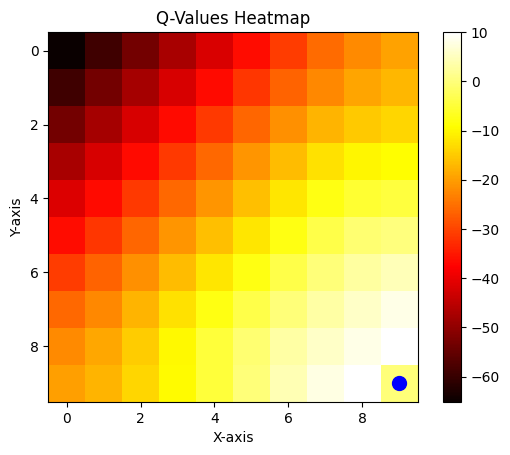

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# تعریف پارامترهای محیط
n_states = 10  # اندازه محیط 10x10
n_actions = 4  # چهار اقدام (بالا، پایین، چپ، راست)
goal_state = (9, 9)  # موقعیت هدف
episodes = 1000  # تعداد اپیزودها
alpha = 0.1  # نرخ یادگیری
gamma = 0.9  # عامل تخفیف
epsilon = 0.1  # احتمال انتخاب اقدام تصادفی

# ساختار Q-Table
Q = np.zeros((n_states, n_states, n_actions))

# تابع انتخاب اقدام با استفاده از ε-greedy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, n_actions - 1)  # اقدام تصادفی
    else:
        return np.argmax(Q[state[0], state[1]])  # اقدام با بیشترین Q-value

# تابع محاسبه پاداش غیرخطی
def reward_function(state):
    if state == goal_state:
        return 10  # پاداش بزرگ برای رسیدن به هدف
    else:
        # پاداش غیرخطی بر اساس فاصله از هدف
        return -np.sqrt((state[0] - goal_state[0])**2 + (state[1] - goal_state[1])**2)

# حلقه یادگیری
for episode in range(episodes):
    state = (0, 0)  # شروع از موقعیت (0, 0)
    done = False
    
    while not done:
        action = choose_action(state)
        
        # اجرای اقدام و دریافت حالت بعدی
        if action == 0:  # حرکت به بالا
            next_state = (max(0, state[0] - 1), state[1])
        elif action == 1:  # حرکت به پایین
            next_state = (min(n_states - 1, state[0] + 1), state[1])
        elif action == 2:  # حرکت به چپ
            next_state = (state[0], max(0, state[1] - 1))
        else:  # حرکت به راست
            next_state = (state[0], min(n_states - 1, state[1] + 1))
        
        # تعیین پاداش
        reward = reward_function(next_state)
        
        # به‌روزرسانی Q-Table
        Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
        
        state = next_state  # به حالت بعدی بروید
        
        if state == goal_state:
            done = True  # به پایان رسیدن اپیزود

# نمایش Q-Table نهایی
print("Q-Table:")
print(Q[:, :, :])

# نمایش سیاست نهایی
policy = np.argmax(Q, axis=2)
print("Policy:")
print(policy)

# نمایش مسیر یادگیری
plt.imshow(np.max(Q, axis=2), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.scatter(goal_state[1], goal_state[0], color='blue', s=100)  # نمایش هدف
plt.title("Q-Values Heatmap")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()